## Para guardar y comit (desde la terminal) : 

git add .

git commit -m "nuevos cambios en el proyecto"

git push origin main 

### Inciso a:

Cargar y/o descargar datos de alguna fuente de información financiera

In [78]:
import pandas as pd
import numpy as np
from scipy.stats import*
import yfinance as yf
import matplotlib.pyplot as plt

### Inciso b:

Calcula los rendimientos diarios del activo financiero, reporta dentro del Streamlit la media,
sesgo y curtosis.

In [79]:
def obtener_datos(activo): 
    
    # Descargar los datos
    df = yf.download(activo, start = "2010-01-01", progress=False )['Close']
    return df
    
    

def calcular_rendimientos(df):
     return df.pct_change().dropna()


In [80]:
activo_escogido = ['BTC-USD']

In [81]:
df_precios = obtener_datos(activo_escogido)
df_rendimientos = calcular_rendimientos(df_precios)

a = df_rendimientos.mean()
rendimiento_medio = df_rendimientos[activo_escogido[0]].mean()


In [82]:
df = yf.download('BTC-USD', start = '2010-01-01', progress = False )['Close']  
returns = df.pct_change().dropna() 
returns

# pct_change() calcula la variación porcentual entre un período y el siguiente.
# Como la función pct_change() genera un NaN en la primera fila (porque no hay un período anterior con el que comparar), dropna() elimina esta fila.

returns = returns.squeeze() # Asegura que returns es una Serie, así también asegurará que np.mean() y np.std() devuelvan escalares.

returns

Date
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
2014-09-22    0.008352
                ...   
2025-03-30   -0.003185
2025-03-31    0.002604
2025-04-01    0.031742
2025-04-02   -0.031507
2025-04-04    0.001833
Name: BTC-USD, Length: 3851, dtype: float64

<Axes: title={'center': 'BTC Price'}, xlabel='Date'>

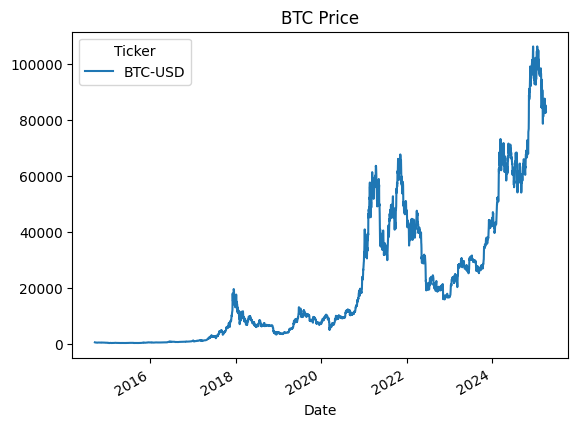

In [83]:
df.plot(kind='line',title='BTC Price')

In [84]:
# Calculating Log Normal Returns

# Use numpy log function to derive log normal returns
daily_returns = np.log(df).diff().dropna()

# Display the last five rows of the data frame to check the output
daily_returns.head(5)

Ticker,BTC-USD
Date,
2014-09-18,-0.074643
2014-09-19,-0.072402
2014-09-20,0.035111
2014-09-21,-0.024968
2014-09-22,0.008317


<Axes: title={'center': 'BTC- Returns'}, xlabel='Date'>

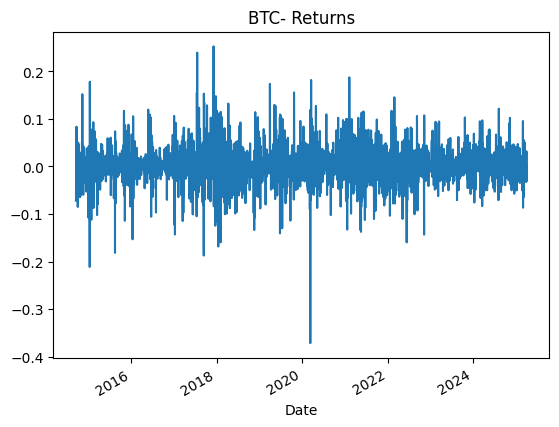

In [85]:
returns.plot(kind='line',title='BTC- Returns') # Graficamos los retornos (rendimientos diarios)

In [86]:
rendimiento_medio = returns.mean() #Columna de los datos
Kurtosis = kurtosis(returns)
skew = skew(returns)

In [87]:
rendimiento_medio

np.float64(0.002003774851867339)

In [88]:
Kurtosis


np.float64(7.556389960618791)

In [89]:
skew


np.float64(-0.10870039947236768)

### Inciso c:

Calcula el VaR y ES para la serie completa de datos a los siguientes intervalos de confianza:
α = 0,95, 0,975, y 0,99 bajo una aproximación paramétrica asumiendo una distribución normal y t-student, además bajo una aproximación histórica y simulación de Monte Carlo.


In [90]:
# Parametric VaR

# Calculate mean and standard deviation 
mean = np.mean(returns)
stdev = np.std(returns)

VaR_95=norm.ppf(1-0.95,mean,stdev)

print("95% VaR of BTC-USD:", round(VaR_95*100,4))

95% VaR of BTC-USD: -5.7225


In [91]:
# Diccionario con los niveles de confianza
porcentaje_confianza = {'95%': 0.95, '97.5%': 0.975, '99%': 0.99}

# Extraer las claves en una lista
var_seleccionado = list(porcentaje_confianza.keys())  

# Convertir cada porcentaje de confianza en su complemento (1 - confianza)
porcentaje = {key: 1 - porcentaje_confianza[key] for key in var_seleccionado}


In [92]:
porcentaje_confianza


{'95%': 0.95, '97.5%': 0.975, '99%': 0.99}

In [93]:
var_seleccionado

['95%', '97.5%', '99%']

In [94]:
porcentaje

{'95%': 0.050000000000000044,
 '97.5%': 0.025000000000000022,
 '99%': 0.010000000000000009}

### Inciso D
 En el mercado, el VaR y el ES son medidas populares para medir el riesgo de una cartera
o un activo, sin embargo, es común ver que usan rolling windows, i.e. fijar una ventana de X días y con
esos datos calcular el VaR o ES del día X + 1.

La estimación del VaR y ES debe de histórico y paramétrico (puedes asumir una distribución normal
por practicidad).

In [95]:
 #Calculo de medias y desviación estandar para Rolling Window de 252 días
rolling_mean = returns.rolling(window= 252).mean()
rolling_std = returns.rolling(window= 252).std()



In [96]:
rolling_mean

Date
2014-09-18         NaN
2014-09-19         NaN
2014-09-20         NaN
2014-09-21         NaN
2014-09-22         NaN
                ...   
2025-03-30    0.001119
2025-03-31    0.001163
2025-04-01    0.001386
2025-04-02    0.001295
2025-04-04    0.001277
Name: BTC-USD, Length: 3851, dtype: float64

In [97]:
rolling_std

Date
2014-09-18         NaN
2014-09-19         NaN
2014-09-20         NaN
2014-09-21         NaN
2014-09-22         NaN
                ...   
2025-03-30    0.027355
2025-03-31    0.027348
2025-04-01    0.027367
2025-04-02    0.027439
2025-04-04    0.027437
Name: BTC-USD, Length: 3851, dtype: float64

In [98]:
#Cálculos de VaR al 95% de confianza, creación de dataframe para poder graficarlo
VaR95_rolling = norm.ppf(1-0.95, rolling_mean, rolling_std)
VaR95_rolling_percent = (VaR95_rolling * 100).round(4)
VaR95_rolling_df = pd.DataFrame({'Date': returns.index, '95% VaR Rolling': VaR95_rolling_percent.squeeze()})
VaR95_rolling_df.set_index('Date', inplace=True)


In [99]:
#Cálculo de hVaR al 95% de confianza, creación de dataframe para graficarlo y poder sacar el ES
hVaR95_rolling = (returns.rolling(window = 252).quantile(1-0.95))
hVaR95_rolling_percent = (hVaR95_rolling * 100).round(4)
hVaR95_rolling_df = pd.DataFrame({'Date': returns.index, '95% hVaR Rolling': hVaR95_rolling_percent.squeeze()})
hVaR95_rolling_df.set_index('Date', inplace=True)
     

In [100]:
#Cálculo del CVaR al 95% de confianza, creación de dataframe para graficarlo
CVaR95_rolling= rolling_mean + (norm.cdf(returns.rolling(window= 252).quantile(1-0.95), rolling_mean, rolling_std)/1-0.95)*rolling_std
CVaR95_rolling_percent = (CVaR95_rolling * 100).round(4)
CVaR95_rolling_df = pd.DataFrame({'Date': df_rendimientos[activo_escogido[0]].index, '95% CVaR Rolling': CVaR95_rolling_percent.squeeze()})
CVaR95_rolling_df.set_index('Date', inplace=True)

In [101]:
#Cálculo del hCVaR al 95% de confianza, creación de dataframe para graficarlo
hCVaR95_rolling = returns.rolling(window=252).apply(lambda x: x[x <= hVaR95_rolling.loc[x.index[-1]]].mean(), raw=False)
hCVaR95_rolling_percent = (hCVaR95_rolling * 100).round(4)
hCVaR95_rolling_df = pd.DataFrame({'Date': returns.index, '95% hCVaR Rolling': hCVaR95_rolling_percent.squeeze()})
hCVaR95_rolling_df.set_index('Date', inplace=True)

Text(0, 0.5, 'Rendimiento Diario')

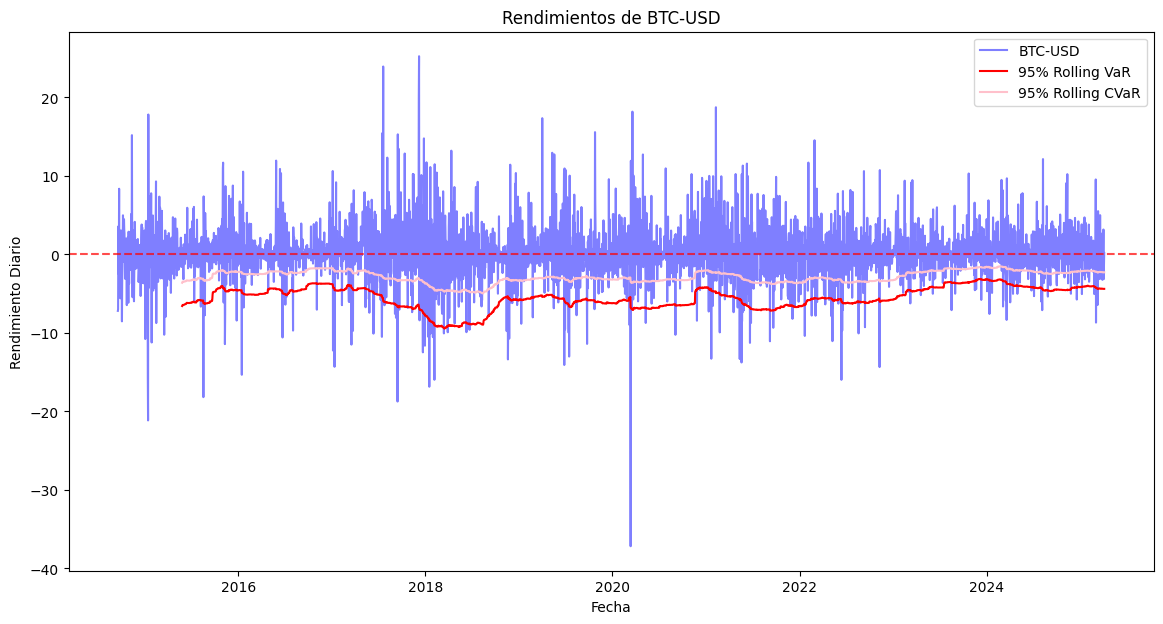

In [ ]:
# Gráfico de rendimientos diarios y Rolling window VaR, hVaR, CVaR al 95% y 99% de confianza 

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_rendimientos.index, df_rendimientos[activo_escogido] * 100, label=activo_escogido, color = 'blue', alpha = 0.5)
ax.plot(VaR95_rolling_df.index, VaR95_rolling_df['95% VaR Rolling'], label='95% Rolling VaR', color='red')

ax.plot(hVaR95_rolling_df.index, hVaR95_rolling_df['95% hVaR Rolling'], label='95% Rolling hVaR', color='black')

ax.plot(CVaR95_rolling_df.index, CVaR95_rolling_df['95% CVaR Rolling'], label='95% Rolling CVaR', color='pink')

ax.plot(hCVaR95_rolling_df.index, hCVaR95_rolling_df['95% hCVaR Rolling'], label='95% Rolling hCVaR', color='blue')


ax.axhline(y=0, color='r', linestyle='--', alpha=0.7)
ax.legend()
ax.set_title(f"Rendimientos de {activo_escogido[0]}")
ax.set_xlabel("Fecha")
ax.set_ylabel("Rendimiento Diario")


In [ ]:
rend = (returns*100).iloc[251:]
B1 = VaR95_rolling_df['95% VaR Rolling'].iloc[251:]

C1 = CVaR95_rolling_df['95% CVaR Rolling'].iloc[251:]

v_var_1 = (rend < B1).sum()

v_cvar_1 =(rend < C1).sum()

p11=v_var_1/len(B1)
p12=v_cvar_1/len(B1)

print(f'Violaciones para Var 95% = {v_var_1} y un porcentaje de {(p11*100).round(4)}%')
print(f'Violaciones para CVar 95% = {v_cvar_1} y un porcentaje de {(p12*100).round(4)}%')

Violaciones para Var 95% = 167 y un porcentaje de 4.6389%
Violaciones para CVar 95% = 447 y un porcentaje de 12.4167%


### Inciso F: 

En esta pregunta se estimará el VaR con una volatilidad móvil y asumiendo una distribución normal

,Confianza,Violaciones de VaR,Porcentaje de Violaciones de VaR
0,0.95,146,0.040556
1,0.99,63,0.017500


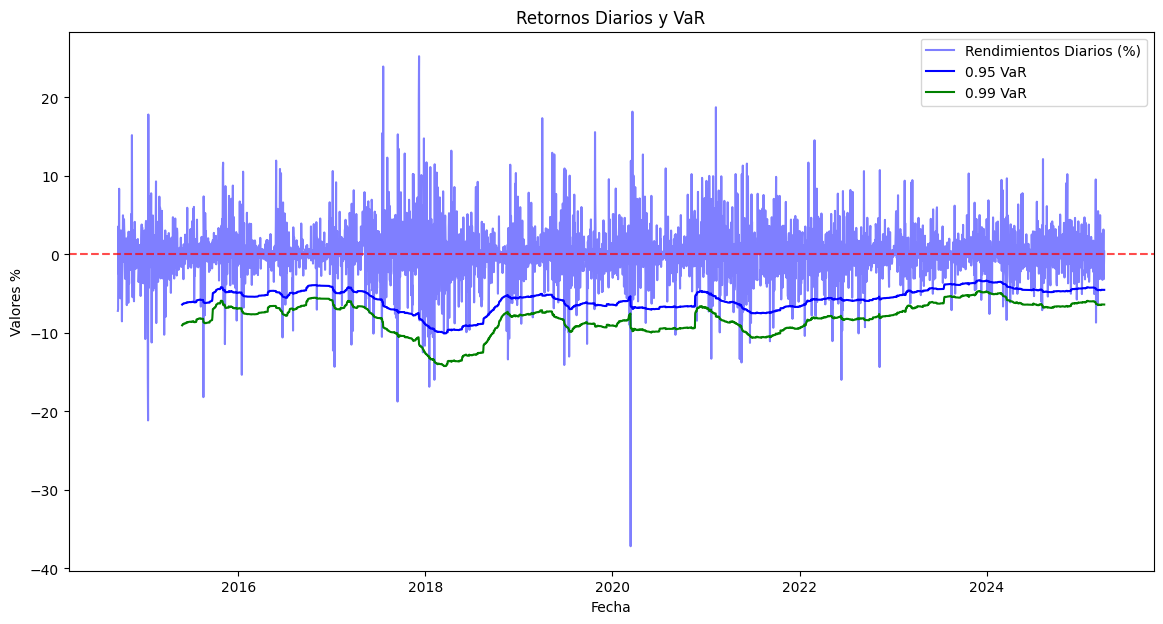

In [ ]:
#st.header("VaR estimado con volatilidad móvil y asumiendo distribución normal")

porcentaje_confianza = [0.95, 0.99]
violaciones = []
fig_5, ax_5 = plt.subplots(figsize=(14, 7))
ax_5.plot(returns.index, returns * 100, label='Rendimientos Diarios (%)', color = 'blue', alpha = 0.5)

for confianza in porcentaje_confianza:
     q_alpha = norm.ppf(1-confianza)
     rolling_std = returns.rolling(window= 252).std()

     VaR_vm = rolling_std * q_alpha
     VaR_vm_percent = (VaR_vm * 100).round(4)
     VaR_vm_df = pd.DataFrame({'Date': returns.index, f'{confianza} VaR Rolling': VaR_vm_percent.squeeze()})
     VaR_vm_df.set_index('Date', inplace=True)

     # Gráfico de rendimientos diarios y var volatil
     col = 'green'	
     if confianza == 0.95:
          col = 'blue'
     ax_5.plot(VaR_vm_df.index, VaR_vm_df[f'{confianza} VaR Rolling'], label=f'{confianza} VaR', color=col)

     # Unimos ambos DataFrames en base a la fecha
     df_merged = pd.merge(returns * 100 , VaR_vm_df[f'{confianza} VaR Rolling'], on='Date')
     # Idenfificamos las violaciones
     df_merged["Violacion_VaR"] = df_merged['BTC-USD'] < df_merged[f'{confianza} VaR Rolling']
     # Contamos ocurrencias
     conteo_violaciones = int(df_merged["Violacion_VaR"].sum())

     violaciones.append(conteo_violaciones)
     tam = (int(VaR_vm_df.count().sum()))


ax_5.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax_5.legend()
ax_5.set_title(f"Retornos Diarios y VaR")
ax_5.set_xlabel("Fecha")
ax_5.set_ylabel("Valores %")
#st.pyplot(fig_5)
out = pd.DataFrame({'Confianza': porcentaje_confianza, 'Violaciones de VaR': violaciones, 'Porcentaje de Violaciones de VaR': [x / tam for x in violaciones]})
out